## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

Using TensorFlow backend.


## Parameters of images

In [2]:
# image width, height,channels
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3  
input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

## import imgaug

In [3]:
import imgaug as ia
from imgaug import augmenters as iaa
ia.seed(1)

In [4]:
def image_simple_augment(image):        
    # The array has shape (32, 64, 64, 3) and dtype uint8.
    rows,cols = image.shape[:2]
    if rows > 512 or cols > 512:
        image = cv2.resize(image,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
        
    images = np.array(
        [image for _ in range(8)],
        dtype=np.uint8
    )

    seq = iaa.Sequential([
        iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
        iaa.Fliplr(0.5), # horizontally flip 50% of the images
        iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
    ])

    images_aug = seq.augment_images(images)
    
    images_aug = np.insert(images_aug,0,image,axis = 0)
    
    return images_aug

In [5]:
# The folder to put augmented figures
dataset_augment = 'dataset/augment' 
# The folder of original figures
dataset_dir ='dataset/jpg'
# The format of figures
pattern='**/*.jpg'
# obtain all figures 
files = sorted(glob(os.path.join(dataset_dir, pattern), recursive=True))
print('have find %d images in dataset'%len(files))

for file in files:
    print('process: %s'%file)
    # read images
    image = cv2.imread(file)    
    # augment images
    images_aug = image_simple_augment(image)
    # save images
    for idx,image in enumerate(images_aug):
        # resize figures to 256*256
        image = cv2.resize(image, (256, 256)) 
        # show image
        cv2.imshow('image;',image)
        # show folder of image
        image_folder = dataset_augment   
       
        if not os.path.exists(image_folder):
            os.makedirs(image_folder)
        # get image name
        image_name = file.split('/')[-1].split('.')[0]
        # write image
        cv2.imwrite(image_folder + '/' + image_name + '_' + str(idx) + '.jpg' ,image)
        # enter esc
        key = cv2.waitKey(100)
        if key == 27:
            break
# relax
#cv2.waitKey(0)
cv2.destroyAllWindows()

have find 1360 images in dataset
process: dataset/jpg/image_0001.jpg
process: dataset/jpg/image_0002.jpg
process: dataset/jpg/image_0003.jpg
process: dataset/jpg/image_0004.jpg
process: dataset/jpg/image_0005.jpg
process: dataset/jpg/image_0006.jpg
process: dataset/jpg/image_0007.jpg
process: dataset/jpg/image_0008.jpg
process: dataset/jpg/image_0009.jpg
process: dataset/jpg/image_0010.jpg
process: dataset/jpg/image_0011.jpg
process: dataset/jpg/image_0012.jpg
process: dataset/jpg/image_0013.jpg
process: dataset/jpg/image_0014.jpg
process: dataset/jpg/image_0015.jpg
process: dataset/jpg/image_0016.jpg
process: dataset/jpg/image_0017.jpg
process: dataset/jpg/image_0018.jpg
process: dataset/jpg/image_0019.jpg
process: dataset/jpg/image_0020.jpg
process: dataset/jpg/image_0021.jpg
process: dataset/jpg/image_0022.jpg
process: dataset/jpg/image_0023.jpg
process: dataset/jpg/image_0024.jpg
process: dataset/jpg/image_0025.jpg
process: dataset/jpg/image_0026.jpg
process: dataset/jpg/image_0027

process: dataset/jpg/image_0228.jpg
process: dataset/jpg/image_0229.jpg
process: dataset/jpg/image_0230.jpg
process: dataset/jpg/image_0231.jpg
process: dataset/jpg/image_0232.jpg
process: dataset/jpg/image_0233.jpg
process: dataset/jpg/image_0234.jpg
process: dataset/jpg/image_0235.jpg
process: dataset/jpg/image_0236.jpg
process: dataset/jpg/image_0237.jpg
process: dataset/jpg/image_0238.jpg
process: dataset/jpg/image_0239.jpg
process: dataset/jpg/image_0240.jpg
process: dataset/jpg/image_0241.jpg
process: dataset/jpg/image_0242.jpg
process: dataset/jpg/image_0243.jpg
process: dataset/jpg/image_0244.jpg
process: dataset/jpg/image_0245.jpg
process: dataset/jpg/image_0246.jpg
process: dataset/jpg/image_0247.jpg
process: dataset/jpg/image_0248.jpg
process: dataset/jpg/image_0249.jpg
process: dataset/jpg/image_0250.jpg
process: dataset/jpg/image_0251.jpg
process: dataset/jpg/image_0252.jpg
process: dataset/jpg/image_0253.jpg
process: dataset/jpg/image_0254.jpg
process: dataset/jpg/image_0

process: dataset/jpg/image_0456.jpg
process: dataset/jpg/image_0457.jpg
process: dataset/jpg/image_0458.jpg
process: dataset/jpg/image_0459.jpg
process: dataset/jpg/image_0460.jpg
process: dataset/jpg/image_0461.jpg
process: dataset/jpg/image_0462.jpg
process: dataset/jpg/image_0463.jpg
process: dataset/jpg/image_0464.jpg
process: dataset/jpg/image_0465.jpg
process: dataset/jpg/image_0466.jpg
process: dataset/jpg/image_0467.jpg
process: dataset/jpg/image_0468.jpg
process: dataset/jpg/image_0469.jpg
process: dataset/jpg/image_0470.jpg
process: dataset/jpg/image_0471.jpg
process: dataset/jpg/image_0472.jpg
process: dataset/jpg/image_0473.jpg
process: dataset/jpg/image_0474.jpg
process: dataset/jpg/image_0475.jpg
process: dataset/jpg/image_0476.jpg
process: dataset/jpg/image_0477.jpg
process: dataset/jpg/image_0478.jpg
process: dataset/jpg/image_0479.jpg
process: dataset/jpg/image_0480.jpg
process: dataset/jpg/image_0481.jpg
process: dataset/jpg/image_0482.jpg
process: dataset/jpg/image_0

process: dataset/jpg/image_0684.jpg
process: dataset/jpg/image_0685.jpg
process: dataset/jpg/image_0686.jpg
process: dataset/jpg/image_0687.jpg
process: dataset/jpg/image_0688.jpg
process: dataset/jpg/image_0689.jpg
process: dataset/jpg/image_0690.jpg
process: dataset/jpg/image_0691.jpg
process: dataset/jpg/image_0692.jpg
process: dataset/jpg/image_0693.jpg
process: dataset/jpg/image_0694.jpg
process: dataset/jpg/image_0695.jpg
process: dataset/jpg/image_0696.jpg
process: dataset/jpg/image_0697.jpg
process: dataset/jpg/image_0698.jpg
process: dataset/jpg/image_0699.jpg
process: dataset/jpg/image_0700.jpg
process: dataset/jpg/image_0701.jpg
process: dataset/jpg/image_0702.jpg
process: dataset/jpg/image_0703.jpg
process: dataset/jpg/image_0704.jpg
process: dataset/jpg/image_0705.jpg
process: dataset/jpg/image_0706.jpg
process: dataset/jpg/image_0707.jpg
process: dataset/jpg/image_0708.jpg
process: dataset/jpg/image_0709.jpg
process: dataset/jpg/image_0710.jpg
process: dataset/jpg/image_0

process: dataset/jpg/image_0912.jpg
process: dataset/jpg/image_0913.jpg
process: dataset/jpg/image_0914.jpg
process: dataset/jpg/image_0915.jpg
process: dataset/jpg/image_0916.jpg
process: dataset/jpg/image_0917.jpg
process: dataset/jpg/image_0918.jpg
process: dataset/jpg/image_0919.jpg
process: dataset/jpg/image_0920.jpg
process: dataset/jpg/image_0921.jpg
process: dataset/jpg/image_0922.jpg
process: dataset/jpg/image_0923.jpg
process: dataset/jpg/image_0924.jpg
process: dataset/jpg/image_0925.jpg
process: dataset/jpg/image_0926.jpg
process: dataset/jpg/image_0927.jpg
process: dataset/jpg/image_0928.jpg
process: dataset/jpg/image_0929.jpg
process: dataset/jpg/image_0930.jpg
process: dataset/jpg/image_0931.jpg
process: dataset/jpg/image_0932.jpg
process: dataset/jpg/image_0933.jpg
process: dataset/jpg/image_0934.jpg
process: dataset/jpg/image_0935.jpg
process: dataset/jpg/image_0936.jpg
process: dataset/jpg/image_0937.jpg
process: dataset/jpg/image_0938.jpg
process: dataset/jpg/image_0

process: dataset/jpg/image_1140.jpg
process: dataset/jpg/image_1141.jpg
process: dataset/jpg/image_1142.jpg
process: dataset/jpg/image_1143.jpg
process: dataset/jpg/image_1144.jpg
process: dataset/jpg/image_1145.jpg
process: dataset/jpg/image_1146.jpg
process: dataset/jpg/image_1147.jpg
process: dataset/jpg/image_1148.jpg
process: dataset/jpg/image_1149.jpg
process: dataset/jpg/image_1150.jpg
process: dataset/jpg/image_1151.jpg
process: dataset/jpg/image_1152.jpg
process: dataset/jpg/image_1153.jpg
process: dataset/jpg/image_1154.jpg
process: dataset/jpg/image_1155.jpg
process: dataset/jpg/image_1156.jpg
process: dataset/jpg/image_1157.jpg
process: dataset/jpg/image_1158.jpg
process: dataset/jpg/image_1159.jpg
process: dataset/jpg/image_1160.jpg
process: dataset/jpg/image_1161.jpg
process: dataset/jpg/image_1162.jpg
process: dataset/jpg/image_1163.jpg
process: dataset/jpg/image_1164.jpg
process: dataset/jpg/image_1165.jpg
process: dataset/jpg/image_1166.jpg
process: dataset/jpg/image_1

## import augmented dataset

In [6]:
# set directory
dataset_dir = 'dataset/augment' 
pattern='**/*.jpg'

# get all file names
files = glob(os.path.join(dataset_dir, pattern), recursive=True)

# store in a dataframe
categories = []
images = []
for file in files:
    image_category = file.split('/')[-1].split('_')[1][:4]
    image_category = np.floor((int(image_category) - 1)/80)
    categories.append(str(image_category))
 
    
 
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [7]:
df.head()

,filename,category
0,dataset/augment/image_0503_4.jpg,6.0
1,dataset/augment/image_0427_0.jpg,5.0
2,dataset/augment/image_0991_4.jpg,12.0
3,dataset/augment/image_1095_3.jpg,13.0
4,dataset/augment/image_0546_4.jpg,6.0


In [8]:
df.tail()

,filename,category
12235,dataset/augment/image_0434_7.jpg,5.0
12236,dataset/augment/image_0728_2.jpg,9.0
12237,dataset/augment/image_0982_3.jpg,12.0
12238,dataset/augment/image_1086_4.jpg,13.0
12239,dataset/augment/image_0510_3.jpg,6.0


## plot shape of dataset

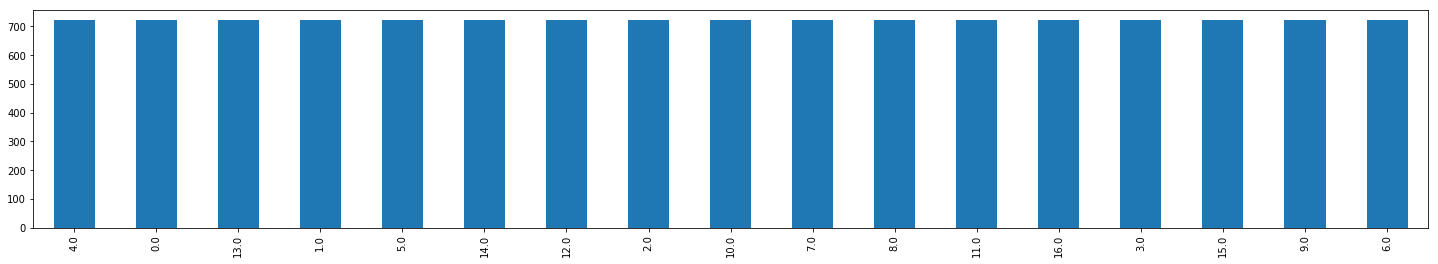

In [9]:
fig = plt.figure(figsize=(25,4))
df['category'].value_counts().plot.bar()

## read images

In [10]:
from keras.preprocessing.image import array_to_img,load_img,img_to_array
from skimage.transform import resize
# resize images
def read_image(path,img_height,img_width,img_chan):
    images = np.zeros((len(path), img_height, img_width, img_chan),dtype=np.float32)
    for n, p in enumerate(path):
        img = load_img(p)
        x = img_to_array(img)[:,:,:]
        x = resize(x, (img_height, img_width, img_chan), mode='constant', preserve_range=True)
        x=x/255
        images[n]=x
    return images

Image_pixel = read_image(df.filename,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [11]:
# print shape of images
print('Image shape: ',Image_pixel.shape)

Image shape:  (12240, 128, 128, 3)


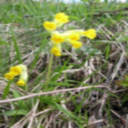

In [12]:
# show one image
array_to_img(Image_pixel[3])

## get labels

In [13]:
# Transfer labels to array
from keras.utils import to_categorical
label = to_categorical(np.array(df['category'].astype(np.float64).tolist()))

In [14]:
label.shape

(12240, 17)

In [15]:
label[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.]], dtype=float32)

## set structure of CNN

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.python.keras.applications import ResNet50

num_classes = 17

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation = "softmax"))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24576)             0         
__________

## set parameter

In [17]:
## Prevent over-fitting
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
# set funciton to lower the learning rate
earlystop = EarlyStopping(patience=15)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# If value of loss decreases, save this model
checkpointer = ModelCheckpoint('flower102_recognition_model.h5', verbose=1, save_best_only=True)
callbacks = [earlystop, learning_rate_reduction,checkpointer]

## Training set and test set

In [18]:
# training set : test set = 8:2
x_train,x_test,y_train,y_test=train_test_split(Image_pixel, label, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(9792, 128, 128, 3)

## Train the model

In [ ]:

epochs= 30
history = model.fit(x_train, y_train, validation_split=0.2, batch_size= 16, epochs= 100, callbacks=callbacks)

Train on 7833 samples, validate on 1959 samples
Epoch 1/100
7833/7833 [==============================] - 300s 38ms/step - loss: 1.3210 - acc: 0.5543 - val_loss: 0.6360 - val_acc: 0.7897

Epoch 00001: val_loss improved from inf to 0.63596, saving model to flower102_recognition_model.h5
Epoch 2/100
7833/7833 [==============================] - 307s 39ms/step - loss: 0.3687 - acc: 0.8814 - val_loss: 0.2648 - val_acc: 0.9102

Epoch 00002: val_loss improved from 0.63596 to 0.26477, saving model to flower102_recognition_model.h5
Epoch 3/100
7833/7833 [==============================] - 274s 35ms/step - loss: 0.0982 - acc: 0.9691 - val_loss: 0.1984 - val_acc: 0.9352

Epoch 00003: val_loss improved from 0.26477 to 0.19840, saving model to flower102_recognition_model.h5
Epoch 4/100
7833/7833 [==============================] - 270s 34ms/step - loss: 0.0764 - acc: 0.9757 - val_loss: 0.1892 - val_acc: 0.9449

Epoch 00004: val_loss improved from 0.19840 to 0.18921, saving model to flower102_recogniti

In [ ]:
model.save("flower17_model.h5")

## plot value of loss

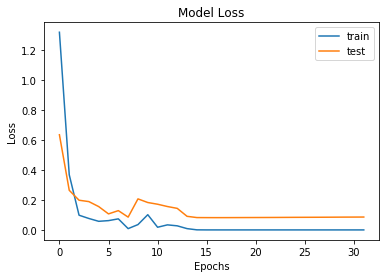

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## read the model

In [ ]:
from keras.models import load_model
model = load_model('flower17_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24576)             0         
__________

## Test on dataset

In [ ]:
pred = model.predict(x_test)
pred_digits = np.argmax(pred,axis=1)

In [ ]:
def compute_accuracy(y_true, y_pred):
    acc = []
    # y_true is a array, y_pred is a number
    for true_mushroom,pre_mushroom in zip(y_true,y_pred):
        if np.argmax(true_mushroom) == pre_mushroom  :
            acc.append(True) 
        else:
            acc.append(False)
    # obtain accuracy
    accuary = np.mean(acc)     
    return  accuary

In [ ]:
# test accuracy
test_accuary = compute_accuracy(y_test,pred_digits)
test_accuary

0.9783496732026143

## randomly pick test images

In [ ]:
# randomly pick 18 images
indexs = np.random.randint(0,len(x_test),18) 
indexs

array([ 304, 1694, 1779, 1919, 1322,  268,  264, 1834, 1081, 2017,   38,
         31,  144,  681, 1176, 1216,  151,  850])

In [ ]:
flower = {1:'Buttercup',2:'ColtsFoot',3:'Daffodil',4:'Daisy',5:'Dandelion',6:'Fritillary',7:'Iris',
         8:'Pansy',9:'Sunflower',10:'Windflower',11:'Snowdrop',12:'LilyValley',13:'Bluebell',
          14:'Crocus',15:'Tigerlily',16:'Tulip',17:'Cowslip'}

## draw predicted results

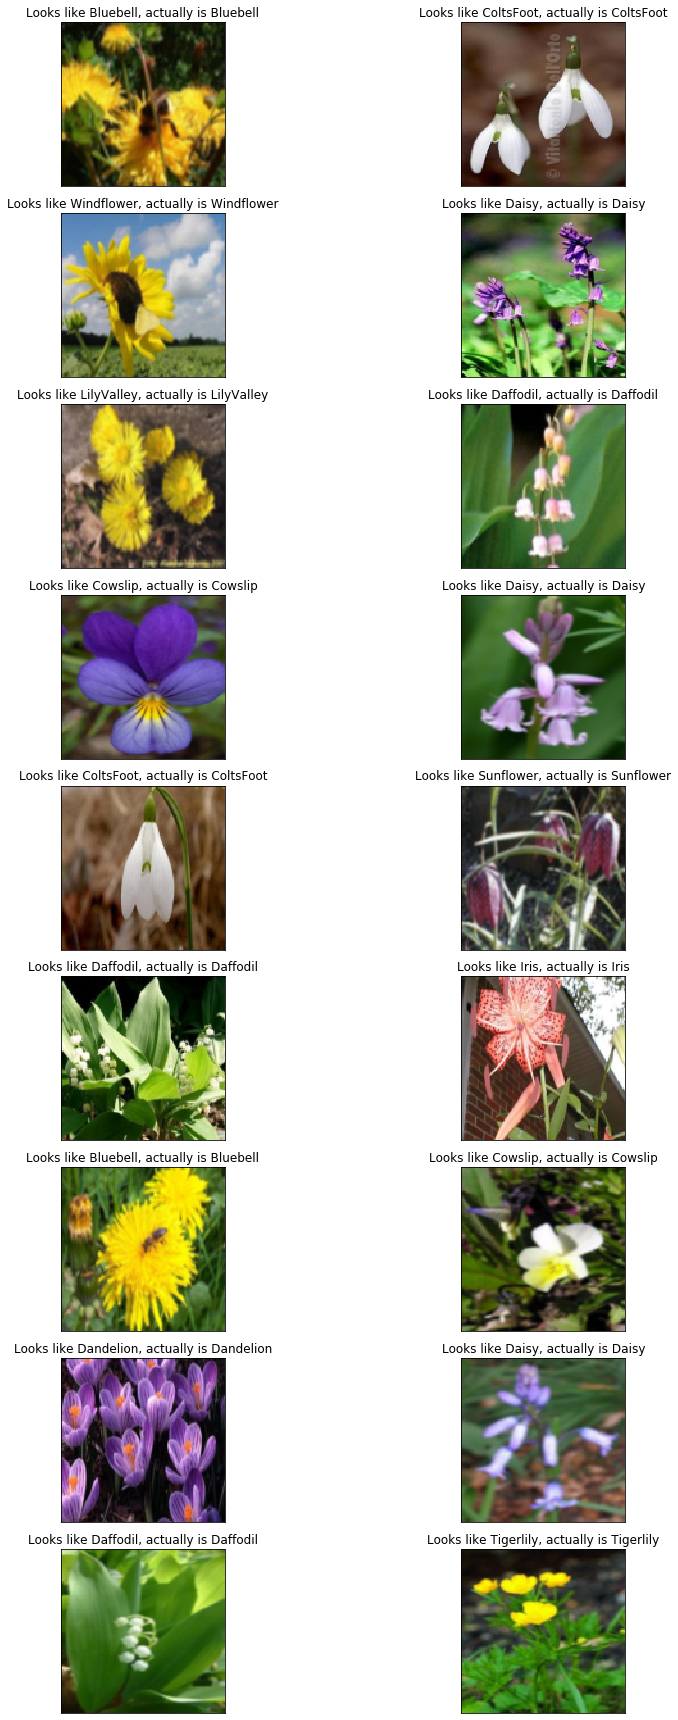

In [ ]:
plt.figure(figsize=(12, 24))
for i,index in enumerate(indexs):
    # get image
    img = x_test[index]  
    # get label
    y_label = np.argmax(y_test[index])
    # expand dimension
    image = np.expand_dims(img, axis=0)
    
    pred = model.predict(image)  
    
    pred_label = np.argmax(pred,axis=1)[0]
    # get probability
    pred_probability = pred[0][pred_label]
    plt.subplot(9, 2, i+1)
    # show figures
    f = plt.imshow(img)
    plt.title('Looks like %s, actually is %s'%(flower[pred_label+1],flower[y_label+1] ))
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

## predict based on one image

In [1]:
from tkinter import*
from tkinter import filedialog
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True)
root.destroy()
print(infiles)

In [ ]:
from keras.preprocessing import image
print(infiles)
img_path = infiles[0]

# load a single image
img_big = image.load_img(img_path, target_size=(512,512))
img = image.load_img(img_path, target_size=IMAGE_SIZE)
# height, width, channels)
img_tensor = image.img_to_array(img)       
# (batch_size, height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)      
# regularization
img_tensor /= 255.                                     


# check prediction
pred = model.predict(img_tensor)[0] 
#print(pred)

plt.imshow(img_big)                           
plt.axis('off')

pred_label = np.argmax(pred)
probability =  pred[pred_label]
if probability > 0.9:
    plt.title('Looks like a {0} with probability {1} , we judge it is a {0}'.format(flower[pred_label+1], probability))
else:
    plt.title("Looks like a {0} with probability {1} , it doesn't seem to be a {0}".format(flower[pred_label+1], probability))
plt.show()   